In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Récupéré depuis Kaggle, dataset des volumes d'importations du gaz en Europe au mois de Janvier 2023, pour les 10 sources géographiques principales

In [85]:
gas = pd.read_csv("euro_gas_imports.csv")

In [86]:
gas

,dates,Norway,Algeria,LNG,Russia,Azerbaijan,UK net flows,Nord Stream,Ukraine Gas Transit,"Yamal (BY,PL)",Turkstream
0,2022-12-30,249,110,351,73,36,60,0,40,0,28
1,2022-12-31,242,107,335,75,36,57,0,38,0,31
2,2023-01-01,243,89,324,69,36,52,0,38,0,26
3,2023-01-02,239,80,348,68,36,56,0,38,0,25
4,2023-01-03,248,80,362,69,36,65,0,38,0,26
5,2023-01-04,242,83,367,66,36,64,0,34,0,26
6,2023-01-05,246,75,344,66,34,73,0,34,0,26
7,2023-01-06,252,79,339,66,34,73,0,31,0,27
8,2023-01-07,245,80,323,64,34,51,0,31,0,24
9,2023-01-08,244,79,311,63,34,50,0,30,0,25


# Problématiques à étudier: 
## - Quelles sont les volumes et tendances par source d'approvisionnement ?
## - Quelle tendance sur les volume totaux ?

In [87]:
variables = [list(gas)]

print(type(variables))

variables

<class 'list'>


[['dates',
  'Norway',
  'Algeria',
  'LNG',
  'Russia',
  'Azerbaijan',
  'UK net flows',
  'Nord Stream',
  'Ukraine Gas Transit',
  'Yamal (BY,PL)',
  'Turkstream']]

In [88]:
countries = variables[0][1::]
countries

['Norway',
 'Algeria',
 'LNG',
 'Russia',
 'Azerbaijan',
 'UK net flows',
 'Nord Stream',
 'Ukraine Gas Transit',
 'Yamal (BY,PL)',
 'Turkstream']

In [89]:
dates = gas.dates
print(type(dates))

dates

<class 'pandas.core.series.Series'>


0     2022-12-30
1     2022-12-31
2     2023-01-01
3     2023-01-02
4     2023-01-03
5     2023-01-04
6     2023-01-05
7     2023-01-06
8     2023-01-07
9     2023-01-08
10    2023-01-09
11    2023-01-10
12    2023-01-11
13    2023-01-12
14    2023-01-13
15    2023-01-14
16    2023-01-15
17    2023-01-16
18    2023-01-17
19    2023-01-18
20    2023-01-19
21    2023-01-20
22    2023-01-21
23    2023-01-22
24    2023-01-23
25    2023-01-24
26    2023-01-25
27    2023-01-26
28    2023-01-27
29    2023-01-28
30    2023-01-29
Name: dates, dtype: object

In [90]:
gas

,dates,Norway,Algeria,LNG,Russia,Azerbaijan,UK net flows,Nord Stream,Ukraine Gas Transit,"Yamal (BY,PL)",Turkstream
0,2022-12-30,249,110,351,73,36,60,0,40,0,28
1,2022-12-31,242,107,335,75,36,57,0,38,0,31
2,2023-01-01,243,89,324,69,36,52,0,38,0,26
3,2023-01-02,239,80,348,68,36,56,0,38,0,25
4,2023-01-03,248,80,362,69,36,65,0,38,0,26
5,2023-01-04,242,83,367,66,36,64,0,34,0,26
6,2023-01-05,246,75,344,66,34,73,0,34,0,26
7,2023-01-06,252,79,339,66,34,73,0,31,0,27
8,2023-01-07,245,80,323,64,34,51,0,31,0,24
9,2023-01-08,244,79,311,63,34,50,0,30,0,25


In [101]:
gastotal = gas.sum(axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_8944\1445958067.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gastotal = gas.sum(axis=1)


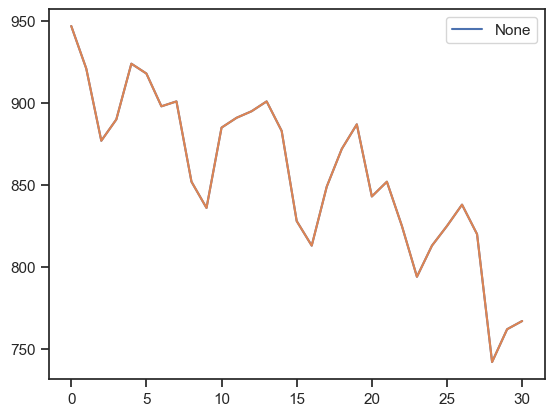

In [100]:
sns.lineplot(data=gastotal)

plt.show()

# Le volume des importations totales de gaz sont en baisse en Europe

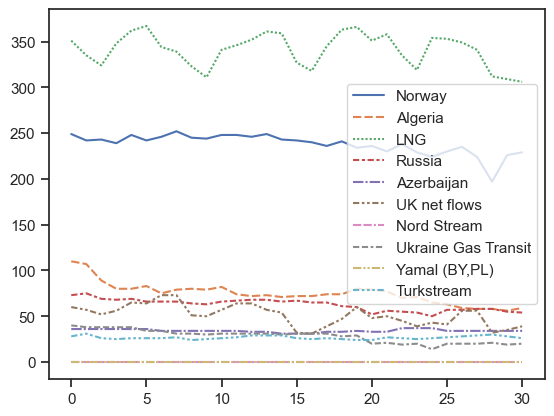

In [92]:
sns.lineplot(data=gas)

plt.show()

# Les importations provenant des bateaux à GNL (LNG) et de Norvège dominent

## A étudier par la suite: La tendance parmi les zones d'importation secondaire...